# Importing Libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('spotify_data.csv')

In [3]:
df.head()

,Artist,Song,Year,album_id,Album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Genres
0,Daniel Powter,Bad Day,2006,4zhigAhPwqp43XVHBiVeQI,Daniel Powter,2005-02-22,0.599,0.785,3,-4.013,1,0.0309,0.44800,0.003360,0.1510,0.520,140.046,233640,4,"['canadian pop', 'neo mellow', 'pop rock']"
1,Sean Paul,Temperature,2006,32Bu3ETQhR1PFCj3ndDlYf,The Trinity,2005-09-26,0.951,0.600,0,-4.675,0,0.0685,0.10600,0.000000,0.0712,0.822,125.040,218573,4,"['dance pop', 'dancehall', 'pop', 'pop rap']"
2,Nelly Furtado Featuring Timbaland,Promiscuous,2006,0i34YzQv4lMroIaDtlWhFo,Promiscuous (In the Style of Nelly Furtado & T...,2013-03-09,0.803,0.574,1,-13.556,1,0.0530,0.00474,0.250000,0.0990,0.766,114.306,243493,4,"['canadian latin', 'canadian pop', 'dance pop'..."
3,James Blunt,You're Beautiful,2006,1ekaxA9Q5GzUPCepx4wzMF,Back to Bedlam,2005-08-08,0.675,0.479,0,-9.870,0,0.0278,0.63300,0.000018,0.0880,0.454,81.998,209493,4,['neo mellow']
4,Shakira Featuring Wyclef Jean,Hips Don't Lie,2006,4JNAQ2MPnM6oh5GSUUic8o,Drew's Famous # 1 Karaoke Hits: 2000's Party H...,2011-02-15,0.797,0.533,8,-9.554,0,0.0690,0.01600,0.168000,0.1550,0.688,99.989,234013,4,[]


In [4]:
# Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            1798 non-null   object 
 1   Song              1798 non-null   object 
 2   Year              1798 non-null   int64  
 3   album_id          1798 non-null   object 
 4   Album             1798 non-null   object 
 5   release_date      1798 non-null   object 
 6   danceability      1798 non-null   float64
 7   energy            1798 non-null   float64
 8   key               1798 non-null   int64  
 9   loudness          1798 non-null   float64
 10  mode              1798 non-null   int64  
 11  speechiness       1798 non-null   float64
 12  acousticness      1798 non-null   float64
 13  instrumentalness  1798 non-null   float64
 14  liveness          1798 non-null   float64
 15  valence           1798 non-null   float64
 16  tempo             1798 non-null   float64


In [5]:
# Checking Null values 
pd.isnull(df).sum()

Artist              0
Song                0
Year                0
album_id            0
Album               0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
Genres              3
dtype: int64

# Duration of songs over the years

Text(0, 0.5, 'Duration')

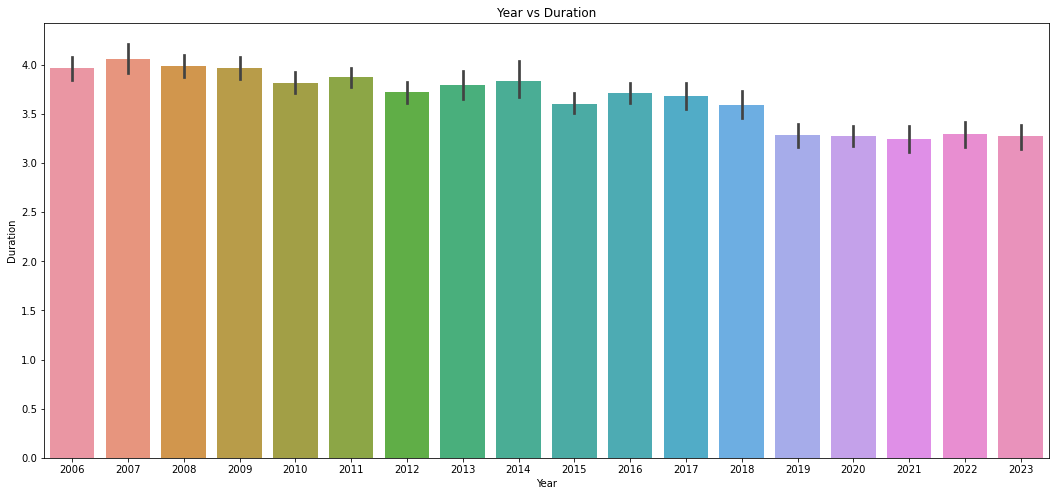

In [ ]:
df['duration_min'] = df['duration_ms'] / 60000
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x=df['Year'], y=df['duration_min'])

ax.set(title='Year vs Duration')
ax.set_xlabel('Year') 
ax.set_ylabel('Duration')

Text(0, 0.5, 'Duration')

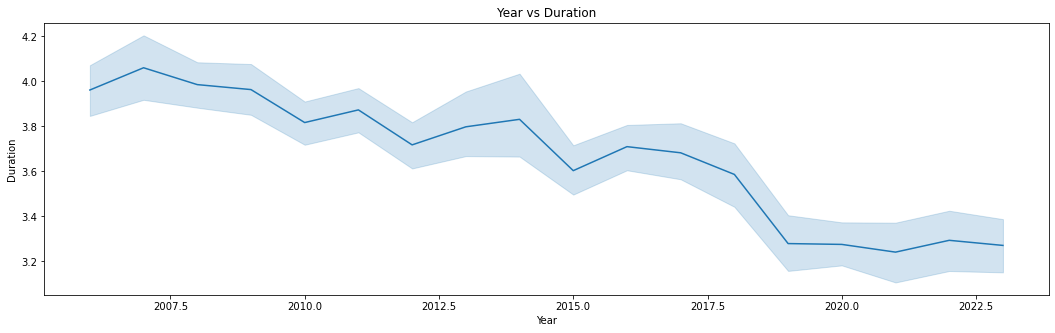

In [8]:
plt.figure(figsize=(18, 5))
sns.lineplot(x=df['Year'], y=df['duration_min'])
plt.title('Year vs Duration')
plt.xlabel('Year')
plt.ylabel('Duration')


# Longest and Shortest song

In [9]:
# Longest song of each year
longest_songs = df.loc[df.groupby('Year')['duration_ms'].idxmax()]

# Shortest song of each year
shortest_songs = df.loc[df.groupby('Year')['duration_ms'].idxmin()]

In [10]:
longest_songs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 81 to 1751
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            18 non-null     object 
 1   Song              18 non-null     object 
 2   Year              18 non-null     int64  
 3   album_id          18 non-null     object 
 4   Album             18 non-null     object 
 5   release_date      18 non-null     object 
 6   danceability      18 non-null     float64
 7   energy            18 non-null     float64
 8   key               18 non-null     int64  
 9   loudness          18 non-null     float64
 10  mode              18 non-null     int64  
 11  speechiness       18 non-null     float64
 12  acousticness      18 non-null     float64
 13  instrumentalness  18 non-null     float64
 14  liveness          18 non-null     float64
 15  valence           18 non-null     float64
 16  tempo             18 non-null     float64
 

# Longest and Shortest song of the year

In [16]:
# Merge longest and shortest songs on 'Year'
summary = pd.merge(
    longest_songs[['Year', 'Song', 'Artist', 'duration_min']],
    shortest_songs[['Year', 'Song', 'Artist', 'duration_min']],
    on='Year',
    suffixes=('_longest', '_shortest')
)

# Rename columns for clarity
summary = summary.rename(columns={
    'song_name_longest': 'Longest Song',
    'artist_name_longest': 'Longest Song Artist',
    'duration_longest': 'Song Duration',
    'song_name_shortest': 'Shortest Song',
    'artist_name_shortest': 'Shortest Song Artist',
    'duration_shortest': 'Song Duration'
})

summary = summary.set_index('Year')
print(summary)

                         Song_longest  \
Year                                    
2006                          Hate Me   
2007  What Goes Around...Comes Around   
2008                       Sexy Can I   
2009                          Forever   
2010                          Forever   
2011                The Edge Of Glory   
2012                            Mercy   
2013                          Mirrors   
2014                  Not A Bad Thing   
2015                          Tuesday   
2016                         Low Life   
2017                   Bad And Boujee   
2018                          Te Bote   
2019                       Sicko Mode   
2020              Laugh Now Cry Later   
2021                   Take My Breath   
2022  All Too Well (Taylor's Version)   
2023                Wait In The Truck   

                                         Artist_longest  duration_min_longest  \
Year                                                                            
2006             

In [20]:
summary.to_csv('longest_and_shortest_songs_by_year.csv', index= True)

# Correlation matrix

Text(0.5, 1.0, 'Correlation Heatmap Between Variables')

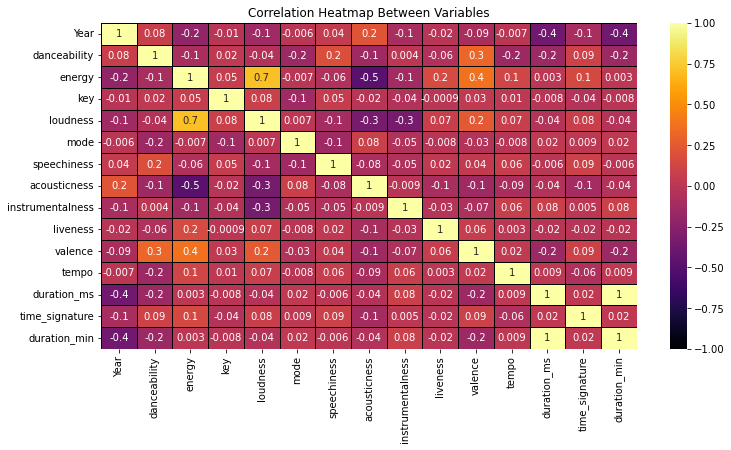

In [21]:
# Select only numeric columns (assuming all non-numeric columns should be excluded)
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_df = numeric_columns.corr(method='pearson')

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt='.1g', vmin=-1, center=0, cmap='inferno', linewidths=1, linecolor='black')
heatmap.set_title("Correlation Heatmap Between Variables")

# Relation between loudness and energy

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

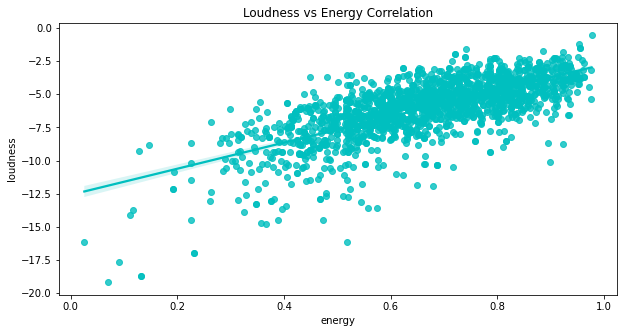

In [22]:
plt.figure(figsize=(10,5))
sns.regplot(data = df, y='loudness', x='energy', color='c').set(title='Loudness vs Energy Correlation')